# Estrutura de Bandas do Grafeno

- PET - Física UFRN
- Ex-Petiano: José Arthur de Luna Oliveira
- Data: 27/06/2025

$\quad$ Neste `Notebook` determinaremos as estruturas de bandas do grafeno e nanofitas de grafeno, utilizando o método aproximativo _tight-binding_. Este método é muito utilizado na área de física de estado sólido para descrever o comportamento de elétrons em sólidos cristalinos, a fim de compreender as propriedades eletrônicas dos mesmos. Portanto, no presente `Notebook`, iremos introduzir esse método aplicando-o a um caso simples, visando explicá-lo de maneira clara e didática, e depois explicar como aplicá-lo ao grafeno.

Este `Notebook` possui 4 seções:

- 1. Introdução;
- 2. Determinando a Estrutura de Banda do Grafeno;
- 3. Modelo TB Aplicado a Nanofitas de Grafeno;
- 4. Conclusão.

In [1]:
from pyqula import geometry
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Detalhes das bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Pyqula

Software versions
Python 3.12.7 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.27.0
OS Windows 11 10.0.26100 SP0
Matplotlib 3.10.0
Numpy 2.1.3
Pyqula 0.0.85
Fri Jun 27 09:55:28 2025 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ O grafeno é um material bidimensional, o qual é apenas uma única camada de átomos de carbono com hibridização sp² e dispostos em uma rede hexagonal, tendo um formato de favos de mel. Devido à sua estrutura única, o grafeno possui propriedades físicas e eletrônicas excepcionais, com alta mobilidade de elétrons, resistência mecânica elevada e excelente condutividade térmica.

$\quad$ No entanto, quando o grafeno é confinado em dimensões menores para formar nanofitas de grafeno, suas propriedades eletrônicas mudam. Esse confinamento quântico e os efeitos de bordas alteram o comportamento dos elétrons nesse material. E entender suas tais mudanças é de grande importância, inclusive para aplicação em dispositivos eletrônicos.

$\quad$ Neste `Notebook` investigaremos suas propriedades eletrônicas, utilizando o método aproximativo _tight-binding_ para encontrar a estrutura de bandas. Determinaremos do grafeno e das nanofitas de grafeno, visando compreender o comportamento dos elétrons nesses materiais.


## 2. Determinando a Estrutura de Banda do Grafeno

$\quad$ Antes de determinar a estrutura de bandas do grafeno com o modelo _tight-biding_, primeiramente devemos entendê-lo. Então, na próxima seção, explicaremos esse método, aplicando-o em uma cadeia monoatômica unidimensional.

### 2.1 Modelo _Tight-Binding_ (TB)

$\quad$ O modelo _tight-binding_ (ligação forte) é um método muito utilizado para descrever comportamento dos elétrons em sólidos, especialmente em estruturas cristalinas, como metais ou semicondutores. O modelo parte do princípio de que os elétrons estão fortemente ligados aos átomos individuais e só podem ser transferidos para átomos vizinhos devido à sobreposição das suas funções de onda. Assim, para entendê-lo melhor, resolveremos o exemplo de uma cadeia monoatômica unidimensional. Antes de qualquer coisa, vale salientar que todo o desenvolvimento abaixo foi baseado na referência [1].

$\quad$ Consideremos uma cadeia unidimensional monoatômica de $N$ átomos (Figura 1), a qual um átomo $n$ possui um único orbital $|n \rangle$. Cada um desses orbitais são ortonormalizados, de maneira que $\langle n| m \rangle = \delta_{n,m}$. Além disso, consideremos que essa cadeia possui limites periódicos, isto é, o átomo $N$ é igual ao $0$.

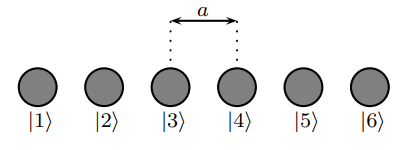

Figura 1: Cadeia monoatômica unidimensional.

$\quad$ Assumiremos uma função de onda geral, que pode ser definida como uma combinação linear dos orbitais:

$$|\Psi \rangle = \sum \limits _n \phi_n|n\rangle, \tag{2.1}$$

onde $\phi_n = \langle n | \psi\rangle$. O primeiro passo dessa solução é modificar a equação de Schroedinger independente do tempo, tal qual é definida como

$$\mathcal{H}|\psi\rangle = E|\psi\rangle. $$

$\quad$ Lembre-se que $1 = \sum\limits_m |m\rangle \langle m|$, então podemos reescrever a equação acima da seguinte maneira

$$\mathcal{H}\sum\limits_m |m\rangle \langle m|\psi\rangle = E|\psi\rangle \implies \sum\limits_m \mathcal{H}|m\rangle \phi_m = E|\psi\rangle$$

$$\implies \sum\limits_m \langle n |\mathcal{H}|m\rangle \phi_m = E\langle n|\psi\rangle,$$

como os elementos da matriz do Hamiltoniano podem ser definidos como: $\mathcal{H}_{nm}=\langle n |\mathcal{H}|m\rangle$. Logo, 

$$\therefore \boxed{\sum\limits_m\mathcal{H}_{nm}\phi_m = E\phi_n}. \tag{2.2}$$

$\quad$ A Equação (2.2) é a equação de Schroedinger, mas agora está escrita em termo dos elementos da matriz do Hamiltoniano. Essa equação é uma aproximação variacional. De tal forma, que em vez de encontrar o estado fundamental exato, ela encontra o melhor estado fundamental possível composto pelos orbitais que colocamos no modelo [1]. Se considerarmos cada vez mais orbitais, o método se torna mais preciso. No entanto, quando há muitos orbitais, a condição de ortogonalidade não é mais verdade. Consequentemente, a equação de Schroedinger torna-se mais complicada. Entretanto, nesse exemplo, iremos trabalhar somente com um orbital por átomo.


$\quad$ A seguir definiremos o Hamiltoniano como a soma da energia cinética do elétron mais a interação coulombiana do elétron com o átomo $j$. Portanto, temos

$$\mathcal{H} = K + \sum \limits_j V_j,$$

no qual $K = p^2/2m$ e o $V_j$ pode ser escrito como

$$V_j = V(\textbf{r} - \textbf{R}_j),$$

em que $\textbf{r}$ é a posição do elétron e $\textbf{R}_m$ é a posição do $j$-ésimo átomo. Com isso, agora determinaremos $\mathcal{H}_{nm}$, então

$$
\begin{align}
\mathcal{H}_{nm} &= \langle n |\mathcal{H}|m\rangle \tag{2.3} \\
            &= \langle n |K|m\rangle + \sum \limits_j \langle n |V_j|m\rangle \tag{2.4}\\
            &= \langle n |(K + V_m)|m\rangle + \sum \limits_{j\neq m} \langle n |V_j|m\rangle \tag{2.5}.
\end{align}
$$

$\quad$ Observe que separamos o termo $V_m$ do somatório, pois ele é a interação do $m$-ésimo núcleo com o elétron, tal qual este é o núcleo que o elétron está. Então, o termo $K + V_m$ é o Hamiltoniano caso não houvesse nenhum outro átomo no sistema. Com isso, podemos definir que

$$(K + V_m)|m\rangle = \epsilon_a|m\rangle,$$

em que, $\epsilon_a$ é a energia do elétron no $m$-ésimo núcleo. Portanto, podemos reescrever a Equação (2.5) da seguinte forma


$$\mathcal{H}_{nm} = \epsilon_a \delta_{n,m}+ \sum \limits_{j\neq m} \langle n |V_j|m\rangle \tag{2.6}.$$

$\quad$ O último termo é o somatório da interação de todos os outros núcleos que não sejam o $m$, devido a essa interação o elétron pode ser tranferido para outro núcleo. Entretanto, nessa abordagem, assumiremos que o elétron só pode saltar para o átomo mais próximo. Então, podemos os termos desse somatórios só podem ser:

$$ \sum \limits_{j\neq m} \langle n |V_j|m\rangle = {\begin{cases}
        V_0, \text{ se }  n=m;
        \\
        -t, \text{ se } n = m \pm 1;
        \\
        0, \text{ outros casos }.
        \end{cases}
        } $$

$\quad$ Onde o termo $V_0$ não transfere um elétron de um local para outro, mas apenas desloca a energia em um determinado local e o termo $t$ é referente ao salto do elétron para outro orbital, chamado de parâmetro de _hopping_. Portanto, a Equação (2.6) pode ser reescrita como

$$\boxed{\mathcal{H}_{nm} = \epsilon_0 \delta_{n,m} -t(\delta_{n+1,m} + \delta_{n-1,m})} \tag{2.7},$$

em que $\epsilon_0 = \epsilon_a + V_0$.

$\quad$ Dessa maneira, substituindo a Equação (2.7) na (2.2), podemos obter a solução do nosso problema, na qual, se supormos uma solução geral da seguinte forma:

$$ \phi_n = \frac{1}{\sqrt{N}}e^{-ikna},$$

em que o denominador é o termo de normalização. Substituindo essa função e a Equação (2.7) na (2.2) obtemos a seguinte relação de dispersão do material.

$$E(k) = \epsilon_0 -2tcos(ka). \tag{2.8}$$

$\quad$ Após todo esse processo, nada mais justo de fazermos o gráfico, este será dentro da primeira zona de Brillouin, isto é, $-\pi/a\leq k \leq \pi/a$. Para fazermos esse gráfico, simplificaremos considerando $\epsilon_0, a, t = 1$. Então, 

Text(0.5, 0, 'k')

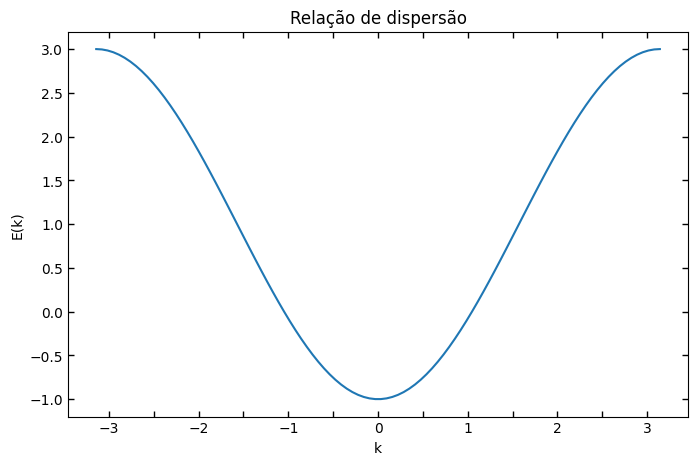

In [3]:
def E(k):
    ep_0, t, a = 1, 1, 1
    return ep_0 - 2*t*np.cos(k*a)

k = np.linspace(-np.pi, np.pi, 100)

plt.figure(figsize = (8,5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top = True, right = True, direction = 'in', length=4, width=1)
plt.xticks(np.arange(-3, 3, 0.5), minor = True)
plt.yticks(np.arange(-1, 3, 0.5), minor = True)

plt.plot(k, E(k))

plt.title("Relação de dispersão")
plt.ylabel("E(k)")
plt.xlabel("k")

$\quad$ Esse é um resultado interessante, pois, diferente do elétron livre, aqui ele possui uma energia máxima e mínima. Essa única relação de dispersão é chamada de banda de energia, e a diferença entre o ponto máximo e o mínimo é chamada de largura de banda. Nessa região, há pelo menos um estado $k$ que o elétron possui energia, para energias fora dessa largura, não há estado $k$.

$\quad$ Essa largura de banda depende da magnitude do termo de salto ($t$), o qual depende da distância interatômica. Pois, caso aumentemos a distância entre os átomos, menor a chance de um elétron ser transferido de um orbital a outro. De forma que, caso essa distância seja muito grande, a energia do estado do elétron será $\epsilon_a$, porque não terá nenhuma interação com outros núcleos.

$\quad$ Além do mais, cada ponto $k$ representa um estado da rede que o elétron pode ocupar. Se todos os estados estão ocupados por elétrons, ou seja, estamos considerando dois elétrons por átomo (cada estado é degenerado pelo _spin_), se diz que a banda está completamente cheia. Se isso for verdade, esse material é classificado como isolante, mas se ela estiver apenas parcialmente cheia, então ele é um metal.

$\quad$ Diante do exposto, esse foi o modelo TB aplicado para uma cadeia monoatômica. De maneira geral, iremos fazer esse mesmo processo, mas para o grafeno. Como foi visto anteriormente, precisamos definir os elementos da matriz do Hamiltoniano, definir uma função de onda, e em seguida resolver a equação de Schroedinger. Com isso, podemos encontrar as relações de dispersão para o grafeno.

### 2.2 Modelo TB Aplicado para o Grafeno

$\quad$ É muito bem conhecido que o grafeno é uma rede bidimensional de carbono com formato de favos de mel (honeycomb). Sua estrutura de rede possui dois átomos-base na célula unitária, já que esta é formada pela junção de duas redes triangulares. Chamaremos uma de sub-rede A e a outra sub-rede de B. Sendo assim, a rede de favos de mel não é uma rede Bravais. A figura abaixo mostra justamente isso que acabou de ser comentado.

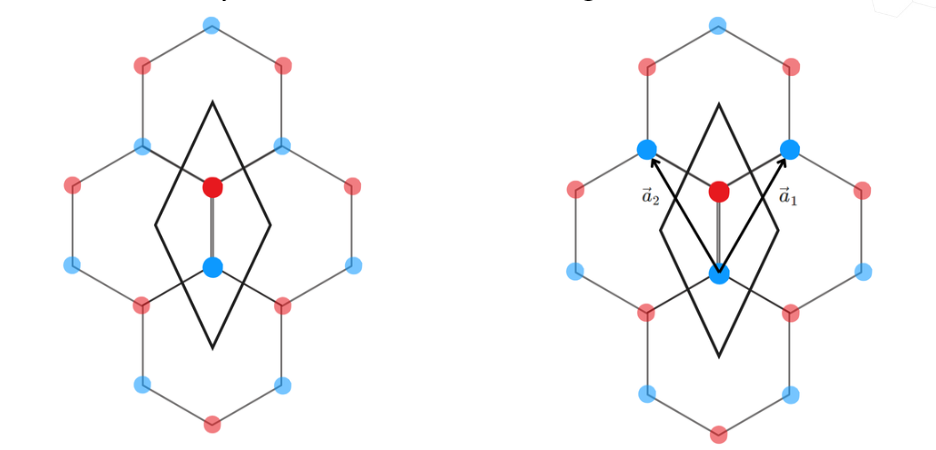

Figura 2: Aqui vemos duas figuras, uma da célula unitária primitiva utilizada na nossa abordagem, e a outra com a definição dos vetores primitivos.

$\quad$ Dessa forma, utilizando de relações geométrica podemos obter os vetores primitivos da rede ($\vec{a}_1$ e $\vec{a}_2$), essa foi apenas uma escolha de vetores, mas poderia ser outros. Então,

$${\begin{cases}
        \vec{a}_1 = \frac{a}{2}\hat{x} + \frac{\sqrt{3}}{2}a\hat{y};
        \\
        \vec{a}_2 = -\frac{a}{2}\hat{x} + \frac{\sqrt{3}}{2}a\hat{y}.
        \end{cases}
        } $$

$\quad$ Em que $a$ é a largura da célula unitária. Além disso, definamos os vetores de primeiros vizinhos são:

$${\begin{cases}
        \vec{\delta}_1 = \frac{a}{\sqrt{3}}\hat{y};
        \\
        \vec{\delta}_2 = \frac{a}{2}\hat{x} - \frac{a}{2\sqrt{3}}\hat{y};
        \\
        \vec{\delta}_3 = -\frac{a}{2}\hat{x} - \frac{a}{2\sqrt{3}}\hat{y}.        
        \end{cases}
        } $$

$\quad$ Portanto, agora podemos definir os vetores da rede direta tanto para a sub-rede A quanto para a sub-rede B, esses devem ser definidos como uma cominação linear dos vetores primitivos. Assim,

$${\begin{cases}
        \vec{R}_A = n_1\vec{a}_1 + n_2\vec{a}_2;
        \\
        \vec{R}_B = \vec{\delta}_l+n_1\vec{a}_1 + n_2\vec{a}_2.   
        \end{cases}
        } $$

Observe que o $\vec{R}_B$ que definimos é a posição de primeiro vizinho do átomo em $\vec{R}_A$, ou seja, $\vec{R}_B = \vec{\delta}_l + \vec{R}_A$.

$\quad$ Então, podemos determinar os vetores primitivos da rede recíproca, que são determinado pelas fórmulas: $\vec{b}_1 = 2\pi\frac{\vec{a}_2\times\hat{z}}{\vec{a}_1\cdot(\vec{a}_2\times\hat{z})}$ e $\vec{b}_2 = 2\pi\frac{\hat{z}\times\vec{a}_1}{\vec{a}_1\cdot(\vec{a}_2\times\hat{z})}$. Logo, teremos

$${\begin{cases}
        \vec{b}_1 = \frac{2\pi}{a}\left( 1, \frac{1}{\sqrt{3}}\right);
        \\
        \vec{b}_2 = \frac{2\pi}{a}\left( -1, \frac{1}{\sqrt{3}}\right).   
        \end{cases}
        } $$

$\quad$ Definido essas informações, agora já temos tudo preparado para resolver a equação de Schroedinger e encontrar as bandas de energia do grafeno com o modelo _tight-binding_. Dessa forma, dada a equação de Schroedinger independente do tempo, obtemos

$$\sum\limits_{\vec{R}_m}\mathcal{H}_{nm}\phi_m(\vec{R_m}) = E\phi_n(\vec{R}_n), \tag{2.9}$$

na qual $\phi_n(\vec{R}_n)$ é a função de onda do orbital. Basicamente é preciso encontrar os elementos da matriz $\mathcal{H}_{nm}$ e então resolver o problema de autovalor encontrando $E(\vec{k})$. Esse resultado já está expresso explicitamente abaixo:

$$E_{\pm}(\vec{k}) = \pm t\sqrt{3 + 4cos\left(\frac{a}{2}k_x\right)cos\left(\frac{\sqrt{3}}{2}ak_y\right) + 2cos(ak_x)}. \tag{2.10}$$

$\quad$ O desenvolvimento para se obter essa expressão é um pouco trabalhoso, então caso o leitor queira saber melhor como é obtido esse resultado recomenda-se a leitura do Apêndice A. 

$\quad$ Note que foi obtido duas energias de dispersão, um referente a banda de valência e a outra de condução. Para entedermos melhor como elas são, nada melhor do que um gráfico dessas bandas.

In [4]:
def E_conduction(t, a, k_x, k_y):
    temp1 = np.cos(k_x*a/2)
    temp2 = np.cos(np.sqrt(3)*k_y*a/2)
    temp3 = np.cos(k_x*a)
    return t*np.sqrt(3 + 4*temp1*temp2 + 2*temp3)

def E_valency(t, a, k_x, k_y):
    temp1 = np.cos(k_x*a/2)
    temp2 = np.cos(np.sqrt(3)*k_y*a/2)
    temp3 = np.cos(k_x*a)
    return -t*np.sqrt(3 + 4*temp1*temp2 + 2*temp3)

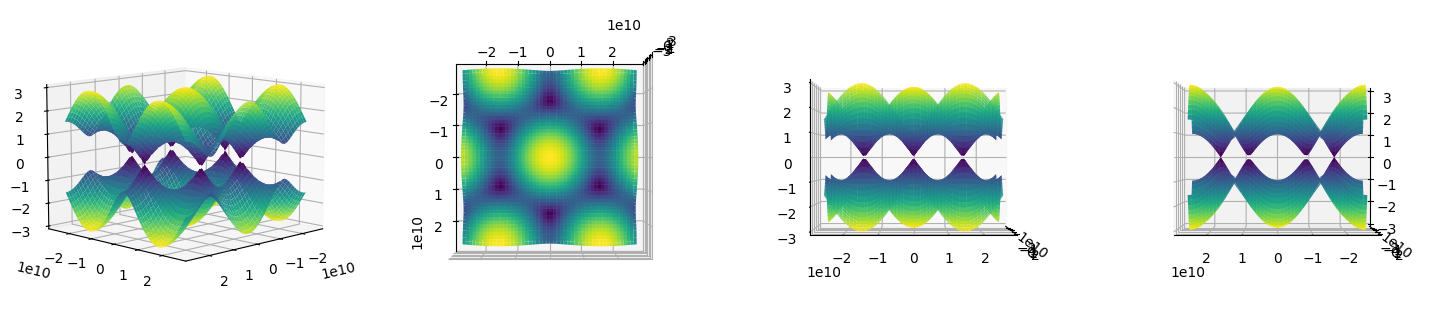

In [5]:
t = 1
a = 2.45e-10

x = np.linspace(-2*np.pi/a, 2*np.pi/a, 1000)
y = np.linspace(-2*np.pi/a, 2*np.pi/a, 1000)

k_x, k_y = np.meshgrid(x, y)

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(141, projection='3d')
ax.plot_surface(k_x, k_y, E_conduction(t, a, k_x, k_y),cmap='viridis')
ax.plot_surface(k_x, k_y, E_valency(t, a, k_x, k_y), cmap='viridis_r')
ax.view_init(elev=10, azim=45)

ax = fig.add_subplot(142, projection='3d')
ax.plot_surface(k_x, k_y, E_conduction(t, a, k_x, k_y),cmap='viridis')
ax.plot_surface(k_x, k_y, E_valency(t, a, k_x, k_y), cmap='viridis_r')
ax.view_init(elev=90, azim=0) 

ax = fig.add_subplot(143, projection='3d')
ax.plot_surface(k_x, k_y, E_conduction(t, a, k_x, k_y),cmap='viridis')
ax.plot_surface(k_x, k_y, E_valency(t, a, k_x, k_y), cmap='viridis_r')
ax.view_init(elev=0, azim=0)

ax = fig.add_subplot(144, projection='3d')
ax.plot_surface(k_x, k_y, E_conduction(t, a, k_x, k_y),cmap='viridis')
ax.plot_surface(k_x, k_y, E_valency(t, a, k_x, k_y), cmap='viridis_r')
ax.view_init(elev=0, azim=90)

$\quad$ Essas duas superfícies que vemos nos gráficos são as chamadas bandas, a banda inferior é chamada de banda de valência e a superior, denominada de banda de condução.
O grafeno é um material que possui um elétron por sítio (átomo), isto é, a quantidade total de elétrons é igual à quantidade de átomos. Antes de mais nada, iremos explicar esta afirmação. O carbono tem quatro elétrons na camada de valência, mas os carbonos do grafeno possuem hibridização sp2, onde cada carbono faz uma ligação dupla e duas simples. Em outras palavras, cada carbono faz três ligações $\sigma$ e uma $\pi$, explicando de forma simplificada, os elétrons que fazem a ligação $\sigma$ estão mais fortemente ligados aos átomos, então é muito difícil fazê-los transitar pelo material. Entretanto, os elétrons que constituem a ligação $\pi$ conseguem transitar os átomos do material, tal qual faz parte do orbital quântico $p_z$. Portanto, podemos considerar que há apenas um elétron por átomo.

$\quad$ Prosseguindo, como cada estado é degenerado, devido ao _spin-up_ e _spin-down_. Então, cada átomo tem dois estados a serem ocupados, ou seja, a quantidade de elétrons é metade da quantidade de estados. Consequentemente, somente uma banda será completamente cheia, a banda de valência. Se o grafeno fosse um material comum, ele seria rotulado com isolante, porém, o gap entre as duas bandas é zero, devido a isso o mesmo é chamado de semimetal ou semicondutor de gap zero.

$\quad$ Nos pontos em que as bandas se tocam, são as posições dos átomos na rede recíproca, também são chamados de pontos de Dirac, pelo fato de formarem cones de Dirac [2]. Mas o que acontece com o elétron nessa região? Para entendermos o que acontece, expandimos em série de Taylor a energia de dispersão em torno do ponto de Dirac, e obtemos:

$$E(\vec{K} + \vec{q}) =\pm t\frac{a\sqrt{3}}{2} |\vec{q}|,$$

o termo $\vec{q}$ é um momento muito pequeno, onde podemos dizer $\vec{p} = \hbar \vec{q}$, substituindo essa relação na equação acima obtemos

$$E(\vec{K} + \vec{q}) =\pm t\frac{a\sqrt{3}}{2\hbar} |\vec{p}|.$$

$\quad$ Observe que para baixas energias a relação de dispersão varia linearmente, tendo o mesmo comportamento que a relação de dispersão do fóton no vácuo $E = c\vec{p}$. Dessa forma, podemos dizer que $v_F = t\frac{a\sqrt{3}}{2}$, essa é a velocidade do elétron próximo ao ponto de Dirac, conhecida como velocidade de Fermi, tal velocidade é da ordem de $10^6 \ m/s$. Com isso, podemos afirmar que o elétron próximo ao ponto de Dirac se comporta como uma partícula relativística sem massa [2, 3, 4].

$\quad$ O nome velocidade de Fermi é dado, pois é a velocidade do elétron na superfície de Fermi ($E = 0$). Para ilustrar essa superfície faremos um gráfico dela ultilizando a biblioteca `Pyqula`. 

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

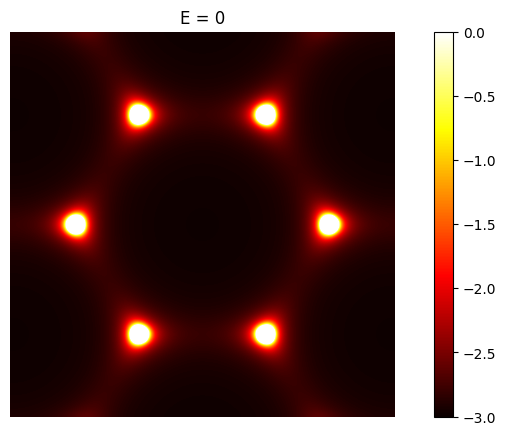

In [6]:
plt.figure(figsize=(10, 5))
g = geometry.honeycomb_lattice() # gera a rede hexagonal de grafeno
h = g.get_hamiltonian() # a partir da rede obtem o hamiltoniano
delta = 0.05
nk = 80 # smearing and kmesh

(x,y,d) = h.get_fermi_surface(e=0,delta=delta,nk=nk) # compute Fermi surface
plt.subplot(1,1,1)
d2d = d.reshape((nk,nk)) - 3
plt.imshow(d2d,origin = 'lower', extent = [0,1,0,1], vmin=-3,vmax=0,cmap="inferno",interpolation="bicubic")
plt.colorbar()
plt.title("E = "+str(0))
plt.hot()
plt.axis("off")

$\quad$ Há outras propriedades que podemos observar no grafeno, mas não estão dentro do escopo deste `Notebook`, caso o leitor tenha interesse em conhecer mais deste material tão incrível aconcelho a leitura das referências [2, 3, 4]. Agora iremos observar o que ocorre quando temos um nanofita de grafeno.

## 3. Modelo TB Aplicado a Nanofitas de Grafeno

$\quad$ No caso anterior, o grafeno não tinha suas dimensões definidas (infinito), de maneira que ele é periódico nas duas dimensões. Mas quando nanofitas de grafeno são periódicas somente em uma dimensão, isso significa que ela é considerada um material unidimensional. Um material para ser classificado como 3D, 2D, 1D e 0D dependerá de quantas dimensões são restritas. Uma estrutura de grafite é denominada de material 3D, pois não é restrita em nenhuma dimensão, mas o grafeno é 2D, ao possuir apenas uma dimensão restrita. Outro bom exemplo é fulereno, o qual é uma esfera de carbono, ele é restrito em todas as dimensões, então ele é classificado como 0D.

$\quad$ Desse modo, uma nanofita de grafeno tem uma largura fixa, ou seja, será restrita em duas dimensões, sendo denominada de material unidimensional (1D). Como agora há uma largura finita, haverá efeito de borda afetando as propriedades eletrônicas do material, e entender isso é importante justamente para aplicações em dispositivos eletrônicos. 

$\quad$ Diante disso, faremos um procedimento parecido com o aplicado ao grafeno infinito. Primeiramente, quando estamos trabalhando com nanofitas de grafeno, haverá dois tipos de bordas: _armchair_ e _zigzag_. A Figura 3 mostra esses dois exemplos, a nanofita à esquerda possui borda _armchair_ e à direita _zigzag_. Diferente do caso anterior, não usaremos uma célula unitária primitiva. A Figura 3 mostra a célula unitária que utilizaremos. Note que a periodicidade é apenas em uma direção, a qual é na direção $y$. Assim, podemos definir os vetores da rede direta da seguinte forma:

$$\vec{R} = n\vec{a}_1= na\hat{y},$$

onde  $\vec{a}_1 = a\hat{y}$ e o termo $n$ é um valor inteiro.

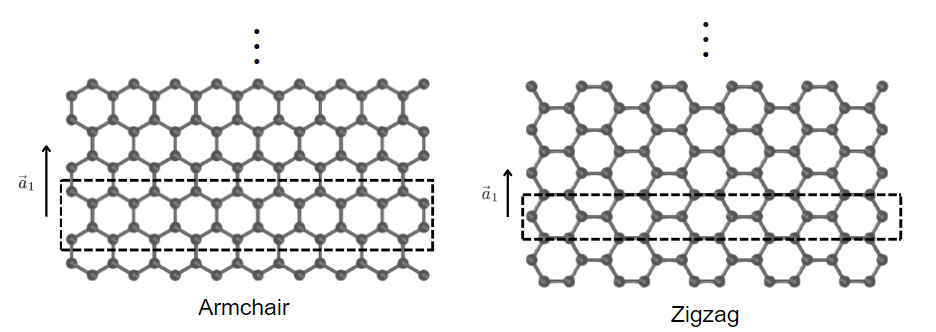

Figura 3: Nesta figura temos os dois tipos de borda que uma nanofita de grafeno pode ter. Além disso, vemos a célula unitária que consideraremos.

$\quad$ A largura da fita é dada pela quantidade de linhas $N$, há uma linha para cada borda, como podemos observar na Figura 4. Em outras abordagens, como a da referência [3], consideramos como linhas apenas uma fileira de átomos, aqui consideraremos duas.

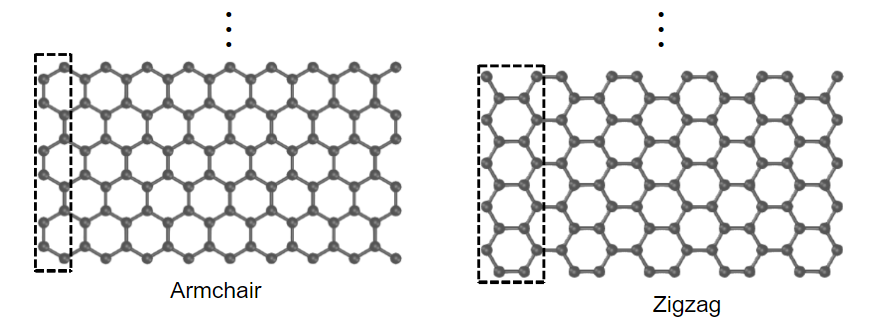

Figura 4: Esta figura ilustra as linhas que definimos na nossa abordagem, uma para cada tipo de nanofita.

### 3.1 Solucionando o problema

$\quad$ Nesse caso, não solucionaremos analiticamente, pois esse tipo de sistema possui matriz do Hamiltoninano tem muitos elementos, se tornando inviável a solução analítica [3]. Para aplicar o moledo _tight-binding_ para nanofitas utilizaremos a biblioteca `Pyqula`, essa biblioteca foi criada justamente para resolver diversos problemas conhecidos na física do estado sólido, caso o leitor tenha interesse em aprender mais sobre a biblioteca aconselho a leitura da documentação dela [5].

$\quad$ Com essa biblioteca, encontrar a estrutura de bandas de nanofitas é mais simples. Devemos criar a estrutura utilizando o comando `honeycomb_armchair_ribbon` (nanofita de borda armchair) ou `honeycomb_zigzag_ribbon` (nanofita de borda zigzag). Definida a estrutura, com o comando `get_hamiltonian` obtemos o Hamiltoniano do sistema e, por fim, para obter a estrutura de bandas, basta utilizar o comando `get_bands`. Dessa forma, em poucas linhas podemos obter a estrutura de bandas das nanofitas. Portanto, nas próximas células de código obteremos as bandas de energia para nanofitas _armchair_ e _zigzag_ com diferentes larguras.

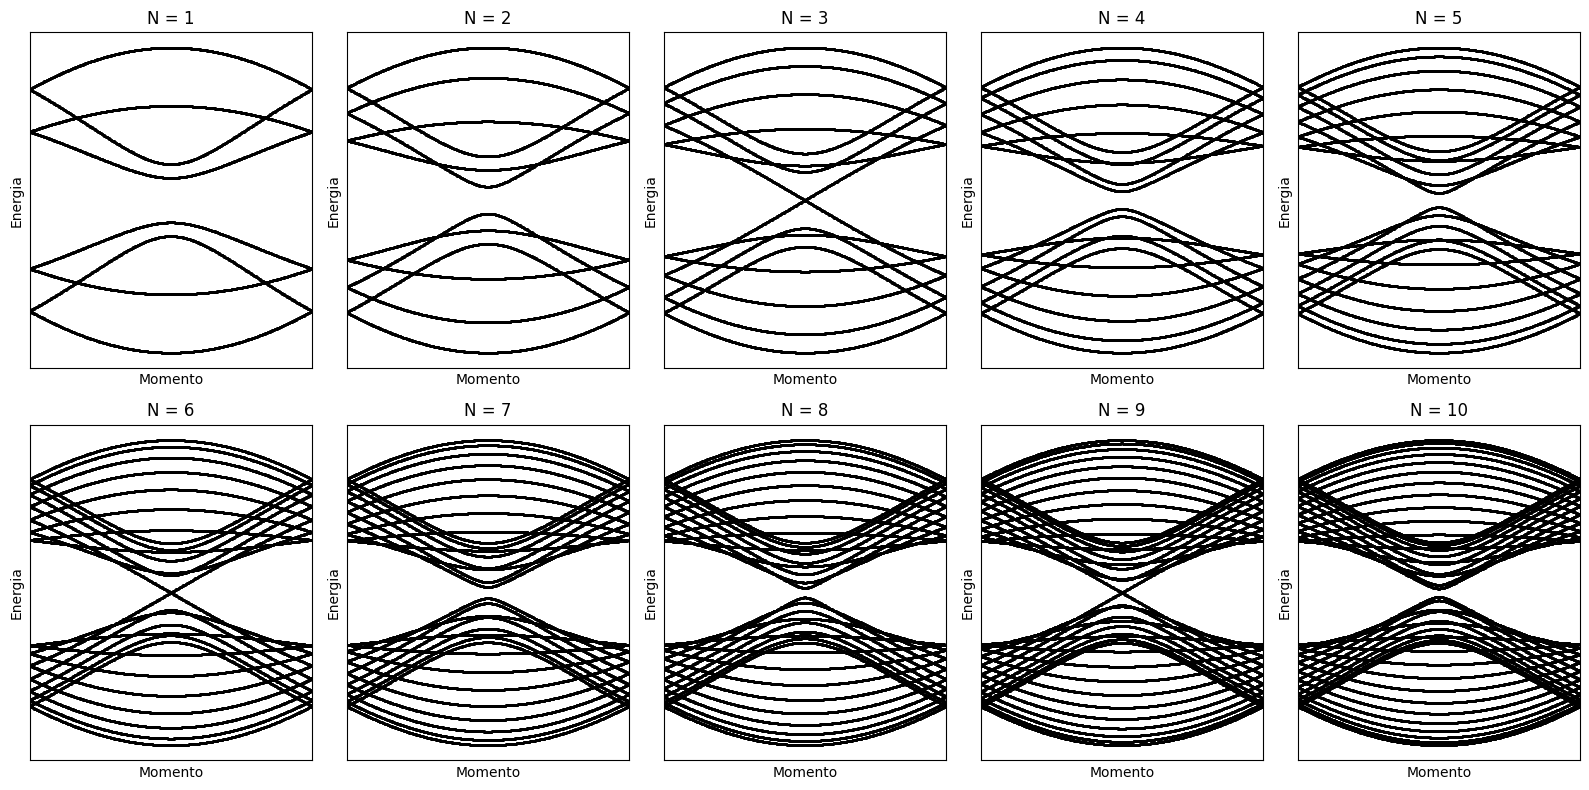

In [7]:
n = np.arange(2, 12, 1)
plt.figure(figsize = (16, 8))
for i in range(1,11):
    g = geometry.honeycomb_armchair_ribbon(n[i-1])
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands(kpath=["M","G","M"]) # compute band structure
    plt.subplot(2,5,i)
    plt.scatter(k,e,c="black",s=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("N = "+str(i))
    plt.xlabel("Momento", )
    plt.ylabel("Energia")
    plt.xlim([min(k),max(k)])
plt.tight_layout()

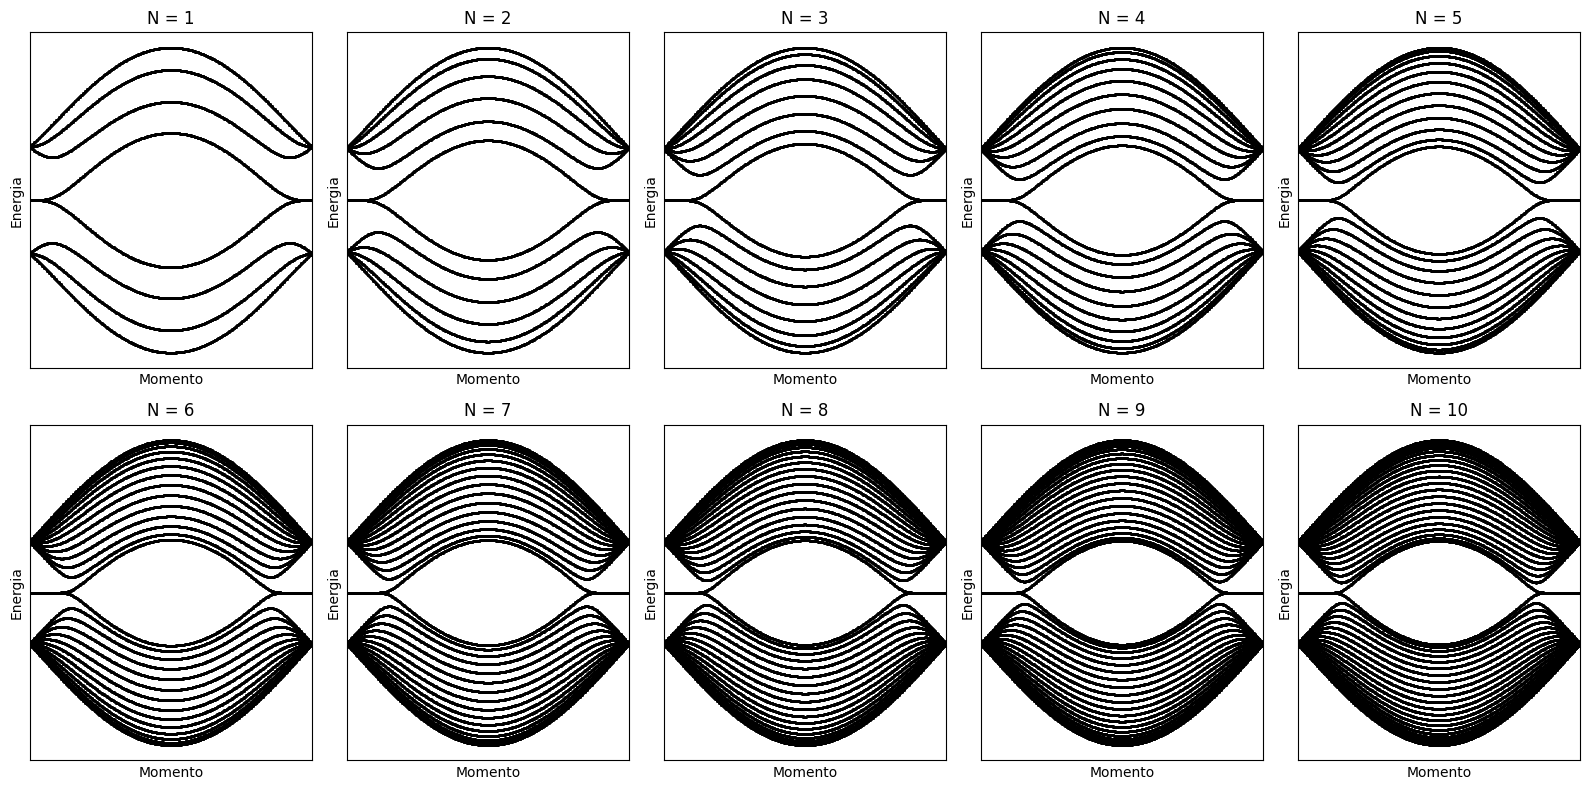

In [8]:
n = np.arange(2, 12, 1)
plt.figure(figsize = (16, 8))
for i in range(1,11):
    g = geometry.honeycomb_zigzag_ribbon(n[i-1])
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands(kpath=["M","G","M"]) # compute band structure
    plt.subplot(2,5,i)
    plt.scatter(k,e,c="black",s=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("N = "+str(i))
    plt.xlabel("Momento")
    plt.ylabel("Energia")
    plt.xlim([min(k),max(k)])
plt.tight_layout()

$\quad$ Observe que temos duas situações diferentes. O primeiro conjunto de gráficos são de nanofitas de bordas _armchair_, note que a maior parte das estruturas possui um gap entre as duas bandas, portanto, nanofitas de bordas armchair são semicondutoras. No entanto, quando $N$ é múltiplo de $3$ as bandas se tocam na energia de Fermi. Isso ocorre pelo fato de que nesse caso o vetor de onda é discretizado pela largura da nanofita ($N$). Assim, quando $N$ é múltiplo de três, um dos vetores de onda permitidos coincide com a posição de um ponto de Dirac na zona de Brillouin. As contas referentes a esse processo não serão abertas neste trabalho, pois estão fora do seu escopo. No entanto, caso o leitor tenha interesse em vê-las, aconselhamos a leitura da referência [4].


$\quad$ Agora, observe que quando a borda da nanofita é zigzag, independente da largura, o material se comporta como condutor, pois as bandas sempre se cruzam. Isso ocorre devido ao fato de haver uma densidade de estados muito alta nas bordas, esses estados são chamados de estados de borda. Dessa forma, esses estados, mesmo que em bordas contrárias, se sobrepõem, devido à sua alta densidade, e assim garantindo o cruzamento das bandas. Além disso, há outros fatores que garantem esse cruzamento das bandas, como a simetria do próprio material, mas explicá-los profundamente também está fora do escopo deste `Notebook`. Caso o leitor tenha interesse em conhecer mais, aconselhamos novamente a leitura da referência [4].

$\quad$ Mas, para dar mais embasamento à explicação anterior, podemos observar a densidade local de estados em nanofitas de borda zigzag fazendo um gráfico. Com a biblioteca `Pyqula` também é possível fazer isso, usando o comando `get_ldos` para obter a densidade local de estados da fita.

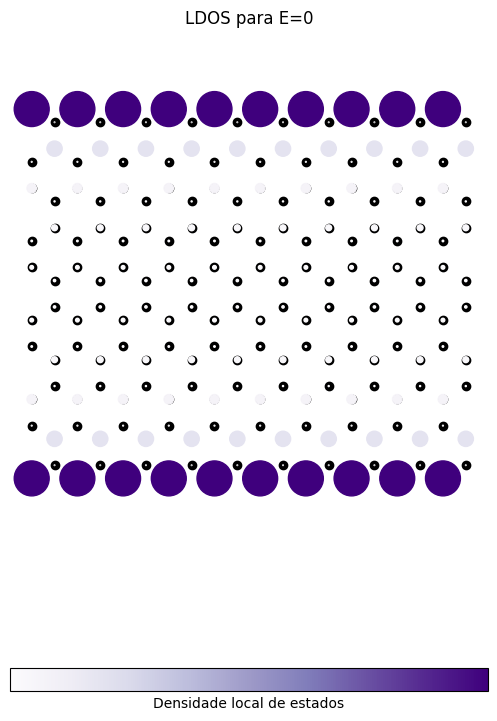

In [9]:
g = geometry.honeycomb_zigzag_ribbon(5)
h = g.get_hamiltonian()
plt.figure(figsize = (10, 8))
plt.subplot(1,2,2)
plt.title("LDOS para E=0")
# now compute the LDOS at zero energy 
x,y,d = h.get_ldos(e=0.0,delta=1e-2,nrep=10) # get the LDOS
plt.scatter(x,y,c="black") # plot lattice as a reference
plt.scatter(x,y,c=d,s=np.array(d)*50,cmap="Purples")
plt.axis("off")
plt.axis("equal") # plot LDOS
# see that the zero modes are located at the edge
plt.colorbar(label="Densidade local de estados",ticks=[],orientation="horizontal")
plt.tight_layout()

$\quad$ Com a figura acima, podemos ver que a densidade de estados é muito grande nas bordas, condizendo com o que foi dito anteriormente.

$\quad$ Portanto, podemos dizer que o efeito de borda presente na nanofita de grafeno cria duas estruturas de mesmo material, mas com propriedades eletrônicas diferentes. De maneira que, se a nanofita tem borda armchair ela é um semicondutor e, caso tenha borda zigzag a nanofita será um condutor.

## 4. Conclusão

$\quad$ Neste `Notebook` buscamos entender as propriedades eletrônicas do grafeno através do modelo _tight-binding_, tal qual é um método aproximativo que visa descrever o comportamento de elétrons em sólidos cristalinos. Ao aplicar esse método no grafeno, vimos que ele possui propriedades de um semimetal ou um semincondutor de gap zero, de maneira que ele possui tanto característica de um isolante quanto de um condutor. Além disso, outro ponto importantíssimo que foi mostrado nesse `Notebook` é que o elétron nos pontos Dirac possui uma alta mobilidade, tendo comportamento de uma partícula relativística sem massa (fóton). No entanto, quando limitamos as dimensões da nossa estrutura criando nanofitas, agora teremos o efeito de borda afetando suas propriedades. De maneira que temos dois tipos de nanofitas: com borda _armchair_ e com borda _zigzag_. Foi observado que as propriedades eletrônicas das nanofitas de grafeno variam de acordo com a borda. Como foi mostrado, nanofitas com borda _armchair_ são semicondutoras e as que têm bordas _zigzag_ são condutoras. Esse é um fato importante para a construção de dispositivos eletrônicos a base de grafeno, pois amplia as suas possibilidades de aplicações para esses dispositivos.

---

## Referência

[1] SIMON, Steven. The Oxford Solid State Basics. [S.l.]: Oxford University Press, 2013. 

[2] DARTORA, C. A. e JIMENEZ, Miguel J. Saldaña e ZANELLA, Fernando. Os Fundamentos Da Física Dos Férmions De Dirac Sem Massa Em (1+2)-D E O Grafeno. Revista Brasileira de Ensino de Física, v. 37, p. 3301–13, 2015. Disponível em: <https://www.scielo.br/j/rbef/a/hpmWqBn9Hg7WqcRDHzVxPwg/?format=html&lang=pt&stop=previous>.

[3] VIEIRA, Anderson Gomes e colab. Investigação Das Propriedades Eletrônicas De Nanofitas De Grafeno E De Nitreto De Boro Utilizando O Modelo _tight-binding_. Revista Brasileira de Ensino De Física, v. 45, 1 Jan 2023. Acesso em: 26 jan 2025.

[4] WAKABAYASHI, Katsunori e colab. Electronic states of graphene nanoribbons and analytical solutions. Science and Technology of Advanced Materials, v. 11, n. 5, p. 054504, Out 2010. Acesso em: 22 nov 2021.

[5] LADO, Jose. GitHub - joselado/pyqula: Python library to compute properties of quantum tight binding models, including topological, electronic and magnetic properties and including the effect of many-body interactions. Disponível em: <https://github.com/joselado/pyqula>. Acesso em: 3 fev 2025. 

## Apêndice A

$\quad$ Este apêndice é onde está o desenvolvimento para obter a Equação (2.10). Então, continuando de onde parou, devemos começar esse procedimento pela equação de Schroedinger,

$$\sum\limits_{\vec{R}_m}\mathcal{H}_{nm}\phi_m(\vec{R_m}) = E\phi_n(\vec{R}_n).$$

$\quad$ Como estamos tratando modelo TB para o grafeno, lembre-se que nesse casa a base é $\{|n\rangle\} = \{|\vec{R}_A\rangle, |\vec{R}_B\rangle\}$, então reindexando as equações acima teremos

$${\begin{cases}
        \tag{1}
        \sum\limits_{\vec{R}_B}\mathcal{H}_{AB}\phi_B(\vec{R_B}) = E\phi_A(\vec{R}_A);
        \\
        \sum\limits_{\vec{R}_A}\mathcal{H}_{BA}\phi_A(\vec{R_A}) = E\phi_B(\vec{R}_B).
        \end{cases}}
        $$

$\quad$ Calculemos primeiramente o elemento $\mathcal{H}_{AA}$:

$$\begin{align}
\mathcal{H}_{AA} &= \langle\vec{R}_A|\mathcal{H}|\vec{R}_A\rangle\tag{2} \\ 
                 &= \langle\vec{R}_A|K|\vec{R}_A\rangle +\sum_j \langle\vec{R}_A|V_j|\vec{R}_A\rangle\tag{3} \\ 
                 &= \langle\vec{R}_A|(K+V_{\vec{R}_A}+V_0)|\vec{R}_A\rangle \tag{4} \\ 
                 &= E_0.\tag{5}
\end{align} 
$$

$\quad$ Analogamente, é fácil ver que $\mathcal{H}_{AA} = \mathcal{H}_{BB} = E_0$. Para simplificar nossa obordagem, assumiremos $E_0 = 0$. Prosseguindo, agora, determinaremos $\mathcal{H}_{AB}$ e $\mathcal{H}_{BA}$:

$$
\begin{align}
\langle\vec{R}_A|\mathcal{H}|\vec{R}_B\rangle &= \langle\vec{R}_A|K|\vec{R}_B\rangle +  \sum \limits_j\langle\vec{R}_A|V_j|\vec{R}_B\rangle \tag{6}\\
&= \langle\vec{R}_A|\epsilon_a|\vec{R}_B\rangle +  \sum \limits_{j\neq B}\langle\vec{R}_A|V_j|\vec{R}_B\rangle. \tag{7}\\
\end{align}
$$

$\quad$ Onde o último termo tem os possíveis resultados,

$$\sum \limits_{j\neq B}\langle\vec{R}_A|V_j|\vec{R}_B\rangle = {\begin{cases}
        V_0, \text{ para } \vec{R}_A = \vec{R}_B;
        \\
        -t, \text{ para } \vec{R}_B = \vec{R}_A + \vec{\delta}_l;
        \\
        0, \text{ outros casos}.
        \end{cases}}
        $$

$\quad$ Portanto, a Equação (7) pode ser reescrita como:

$$\mathcal{H}_{AB}= E_0\delta_{\vec{R}_A, \vec{R}_B}-t\sum\limits_{l=1}^3\delta_{\vec{R}_A,\vec{R}_A + \vec{\delta}_l},$$

em que, $E_0 = \epsilon_a + V_0$, mas como definimos anteriormente $E_0 = 0$. Então,

$$\mathcal{H}_{AB}= -t\sum\limits_{l=1}^3\delta_{\vec{R}_A,\vec{R}_A + \vec{\delta}_l}, \tag{8}$$

Analogamente, é fácil mostrar que

$$\mathcal{H}_{BA}= -t\sum\limits_{l=1}^3\delta_{\vec{R}_B,\vec{R}_B - \vec{\delta}_l}. \tag{9}$$

$\quad$ Aplicando as Equações (8) e (9) na Equação (1), obtemos

$${\begin{cases}
        -t \sum\limits_{\vec{R}_B}\sum\limits_{l=1}^3\delta_{\vec{R}_A,\vec{R}_A + \vec{\delta}_l}\phi_B(\vec{R_B}) = E\phi_A(\vec{R}_A); \tag{10}
        \\
        -t \sum\limits_{\vec{R}_A}\sum\limits_{l=1}^3\delta_{\vec{R}_B,\vec{R}_B - \vec{\delta}_l}\phi_A(\vec{R_A}) = E\phi_B(\vec{R}_B).
        \end{cases}}
        $$

$\quad$ Nessas duas equações pode-se retirar os somatórios e reescreve-las da seguinte maneira:

$${\begin{cases}
        -t\sum\limits_{l=1}^3\phi_B(\vec{R}_A + \vec{\delta}_l) = E\phi_A(\vec{R}_A); \tag{11}
        \\
        -t\sum\limits_{l=1}^3\phi_A(\vec{R}_B - \vec{\delta}_l) = E\phi_B(\vec{R}_B).
        \end{cases}}
        $$

$\quad$ Assumindo que os estados $\phi_n(\vec{R}_n)$ são estados de Bloch, ou seja, $\phi_n(\vec{R}_n) = u_n e^{i\vec{k}\cdot \vec{R}_n}$, em que $\vec{k}$ são vetores da rede recíproca. Substituindo isso na Equação (11), obtemos

$${\begin{cases}
        -t\sum\limits_{l=1}^3u_Be^{i\vec{k}\cdot (\vec{R}_A + \vec{\delta}_l)}= Eu_Ae^{i\vec{k}\cdot\vec{R}_A };
        \\
        -t\sum\limits_{l=1}^3u_Ae^{i\vec{k}\cdot (\vec{R}_B - \vec{\delta}_l)} = Eu_Be^{i\vec{k}\cdot\vec{R}_B}.
        \end{cases}}
        $$

$$\implies {\begin{cases}
        -tu_B\sum\limits_{l=1}^3e^{i\vec{k}\cdot\vec{\delta}_l}= Eu_A;
        \\
        -tu_A\sum\limits_{l=1}^3e^{-i\vec{k}\cdot\vec{\delta}_l} = Eu_B.
        \end{cases}}
        $$

$\quad$ Para simplicar as expressões acima, consideremos $f(\vec{k}) = \sum\limits_{l=1}^3e^{i\vec{k}\cdot\vec{\delta}_l}$, a qual $f(\vec{k}) \in \mathbb{C}$. Então, 

$$ {\begin{cases}
        -tu_Bf(\vec{k}) = Eu_A;
        \\
        -tu_Af^*(\vec{k})= Eu_B.
        \end{cases}}
        $$

$\quad$ Note que esse sistema de equações pode ser colocada em forma matricial,

$$
-t\begin{pmatrix}
  0 & f(\vec{k}) \\
  f^*(\vec{k}) & 0 
\end{pmatrix}\begin{pmatrix}
  u_A \\
  u_B
\end{pmatrix} = E\begin{pmatrix}
  u_A \\
  u_B
\end{pmatrix}
$$

$$\implies \begin{pmatrix}
  -E & -tf(\vec{k}) \\
  -tf^*(\vec{k}) & -E 
\end{pmatrix}\begin{pmatrix}
  u_A \\
  u_B
\end{pmatrix} = 0.$$

$\quad$ Como $u_A, u_B \neq 0$, então 

$$det\begin{pmatrix}
  -E & -tf(\vec{k}) \\
  -tf^*(\vec{k}) & -E 
\end{pmatrix} = 0$$

$$\implies E^2 -t^2|f(\vec{k})|^2 = 0 \implies E_{\pm}(\vec{k}) = \pm\sqrt{t^2|f(\vec{k})|^2}$$

$$\therefore E_{\pm}(\vec{k}) = \pm t|f(\vec{k})| . \tag{12}$$

$\quad$ A seguir, determinaremos explicitamente o termo $|f(\vec{k})|$. Calcularemos primeiramente $|f(\vec{k})|^2$:

$$\begin{align}
|f(\vec{k})|^2 &= \left[\sum\limits_{l=1}^3e^{i\vec{k}\cdot\vec{\delta}_l}\right]\left[\sum\limits_{l=1}^3e^{-i\vec{k}\cdot\vec{\delta}_l}\right] \tag{13}\\
                 &= \left[e^{\frac{ik_ya}{\sqrt{3}}} + e^{\frac{-ia}{2}(k_x + \frac{k_y}{\sqrt{3}})} + e^{\frac{ia}{2}(k_x - \frac{k_y}{\sqrt{3}})}\right]\left[e^{-\frac{ik_ya}{\sqrt{3}}} + e^{\frac{ia}{2}(k_x + \frac{k_y}{\sqrt{3}})} + e^{-\frac{ia}{2}(k_x - \frac{k_y}{\sqrt{3}})}\right] \tag{14}\\
                 &=1 + e^{ia\left[\frac{1}{2}(k_x + \frac{k_y}{\sqrt{3}}) + \frac{k_y}{\sqrt{3}}\right]} + e^{ia\left[\frac{-1}{2}(k_x - \frac{k_y}{\sqrt{3}}) + \frac{k_y}{\sqrt{3}}\right]} + e^{-ia\left[\frac{1}{2}(k_x + \frac{k_y}{\sqrt{3}}) + \frac{k_y}{\sqrt{3}}\right]} + 1 + e^{-\frac{ia}{2}(k_x + \frac{k_y}{\sqrt{3}} + k_x - \frac{k_y}{\sqrt{3}})} + e^{ia\left[\frac{1}{2}(k_x - \frac{k_y}{\sqrt{3}}) - \frac{k_y}{\sqrt{3}}\right]} + e^{\frac{ia}{2}(k_x + \frac{k_y}{\sqrt{3}} + k_x - \frac{k_y}{\sqrt{3}})} + 1 \tag{15}\\
                 &= 3 + e^{\frac{ia}{2}\left(k_x + \frac{3k_y}{\sqrt{3}}\right)} + e^{\frac{ia}{2}\left(-k_x + \frac{3k_y}{\sqrt{3}}\right)} + e^{-\frac{ia}{2}\left(k_x + \frac{3k_y}{\sqrt{3}}\right)}  + e^{-iak_x} + e^{\frac{ia}{2}\left(k_x - \frac{3k_y}{\sqrt{3}}\right)} + e^{iak_x}\tag{16}.\\
\end{align}
$$

Lembre-se que $e^{i\theta} = cos\theta +isin\theta$. Logo,

$$\begin{align}
|f(\vec{k})|^2  &= \left\{3 + 2cos\left[\frac{a}{2}\left(k_x + k_y\sqrt{3}\right)\right] + 2cos\left[\frac{a}{2}\left(-k_x +k_y\sqrt{3}\right)\right] + 2cos(ak_x)\right\} \tag{17}\\
                &=\left\{3 + 2\left[cos\left(\frac{ak_x}{2}\right)cos\left(\frac{k_y\sqrt{3}}{2}\right)-sin\left(\frac{ak_x}{2}\right)sin\left(\frac{k_y\sqrt{3}}{2}\right)\right] + 2\left[cos\left(\frac{ak_x}{2}\right)cos\left(\frac{k_y\sqrt{3}}{2}\right)+sin\left(\frac{ak_x}{2}\right)sin\left(\frac{k_y\sqrt{3}}{2}\right)\right] + 2cos(ak_x)\right\} \tag{18}\\
                &= 3 + 4cos\left(\frac{ak_x}{2}\right)cos\left(\frac{k_y\sqrt{3}}{2}\right) + 2cos(ak_x). \tag{19}
\end{align}
$$

$\quad$ Com o resultado acima temos, então

$$|f(\vec{k})|= \sqrt{3 + 4cos\left(\frac{ak_x}{2}\right)cos\left(\frac{k_y\sqrt{3}}{2}\right) + 2cos(ak_x)},$$

$$\therefore \boxed{E_{\pm}(\vec{k}) = \pm t\sqrt{3 + 4cos\left(\frac{ak_x}{2}\right)cos\left(\frac{ak_y\sqrt{3}}{2}\right) + 2cos(ak_x)}} \tag{20}$$

$\quad$ A Equação (20) é justamente a relação de dispersão do grafeno, utilizando o modelo TB.

## Apêndice B

$\quad$ Neste apêndice está exposto o desenvolvimento matemático da aproximação da relação de dispersão do grafeno para baixas energias. Consideremos um ponto de Dirac $\vec{K}$, onde $E(\vec{K}) = 0$, expandiremos a energia de dispersão obtida (Equação (2.10)) em série de Taylor em torno desse ponto. Sabendo que $E(\vec{k}) = \pm t|f(\vec{k})|$, em vez de expandirmos o $E(\vec{k})$ diretamente, faremos essa expansão para $f(\vec{k})$. Então,

$$f(\vec{k}) = f(\vec{K}) + \left(\frac{\partial f}{\partial k_x}\right|_{\vec{k} = \vec{K}}(k_x - K_x) + \left(\frac{\partial f}{\partial k_y}\right|_{\vec{k} = \vec{K}}(k_y - K_y)$$

$$\implies f(\vec{k}) =  \left(\frac{\partial f}{\partial k_x}\right|_{\vec{k} = \vec{K}}(k_x - K_x) + \left(\frac{\partial f}{\partial k_y}\right|_{\vec{k} = \vec{K}}(k_y - K_y),$$

considerando que $\vec{k} = \vec{K} + \vec{q}$, em que $|\vec{q}| \ll \pi/a$. Portanto,

$$f(\vec{K} + \vec{q}) =  \left(\frac{\partial f}{\partial k_x}\right|_{\vec{k} = \vec{K}}q_x + \left(\frac{\partial f}{\partial k_y}\right|_{\vec{k} = \vec{K}}q_y.$$

$\quad$ Dado que $f(\vec{k}) = e^{\frac{ik_ya}{\sqrt{3}}} + e^{\frac{-ia}{2}(k_x + \frac{k_y}{\sqrt{3}})} + e^{\frac{ia}{2}(k_x - \frac{k_y}{\sqrt{3}})}$, então

$$\begin{align}
f(\vec{K} + \vec{q}) &=  \left[\frac{ia}{2}e^{i\frac{a}{2}(k_x - \frac{k_y}{\sqrt{3}})}- \frac{ia}{2}e^{-i\frac{a}{2}(k_x + \frac{k_y}{\sqrt{3}})}\right|_{\vec{k} = \vec{K}}q_x + \left[\frac{ia}{\sqrt{3}}e^{\frac{ia}{\sqrt{3}}k_y} - \frac{ia}{2\sqrt{3}}e^{i\frac{a}{2}(k_x - \frac{k_y}{\sqrt{3}})}- \frac{ia}{2\sqrt{3}}e^{-i\frac{a}{2}(k_x + \frac{k_y}{\sqrt{3}})}\right|_{\vec{k} = \vec{K}}q_y \tag{1}\\
                &=\frac{ia}{2}\left[e^{i\frac{a}{2}(k_x - \frac{k_y}{\sqrt{3}})}- e^{-i\frac{a}{2}(k_x + \frac{k_y}{\sqrt{3}})}\right|_{\vec{k} = \vec{K}}q_x + \frac{ia}{\sqrt{3}}\left[e^{\frac{ia}{\sqrt{3}}k_y} - \frac{1}{2}e^{i\frac{a}{2}(k_x - \frac{k_y}{\sqrt{3}})}- \frac{1}{2}e^{-i\frac{a}{2}(k_x + \frac{k_y}{\sqrt{3}})}\right|_{\vec{k} = \vec{K}}q_y. \tag{2}\\
\end{align}
$$

$\quad$ Considerando que $\vec{K} = \frac{2\pi}{a}\left(\frac{2}{3}, 0\right)$, então

$$f(\vec{K} + \vec{q}) =\frac{ia}{2}\left(e^{i\frac{2\pi}{3}}- e^{-i\frac{2\pi}{3}}\right)q_x + \frac{ia}{\sqrt{3}}\left (1 - \frac{1}{2}e^{i\frac{2\pi}{3}} - \frac{1}{2}e^{-i\frac{2\pi}{3}}\right)q_y.$$

$\quad$ Lembre-se da relação $e^{i\theta} = cos(\theta) + isen(\theta)$, com isso teremos

$$
\begin{align}
f(\vec{K} + \vec{q}) &= \frac{ia}{2} \left[ \cos\left(\frac{2\pi}{3}\right) + i\sin\left(\frac{2\pi}{3}\right) - \cos\left(\frac{2\pi}{3}\right) + i\sin\left(\frac{2\pi}{3}\right) \right] q_x \\
&\quad + \frac{ia}{\sqrt{3}} \left\{ 1 - \frac{1}{2} \left[ \cos\left(\frac{2\pi}{3}\right) + i\sin\left(\frac{2\pi}{3}\right) + \cos\left(\frac{2\pi}{3}\right) - i\sin\left(\frac{2\pi}{3}\right) \right] \right\} q_y \tag{3} \\
&= -a \sin\left(\frac{2\pi}{3}\right) q_x + \frac{ia}{\sqrt{3}} \left[ 1 - \cos\left(\frac{2\pi}{3} \right) \right] q_y \tag{4} \\
&= -\frac{a\sqrt{3}}{2} q_x + \frac{ia\sqrt{3}}{2} q_y \tag{5}
\end{align}
$$


$$\therefore \boxed{f(\vec{K} + \vec{q}) = -\frac{a\sqrt{3}}{2}\left(q_x - iq_y\right)}. \tag{6}$$

$\quad$ A partir desse resultado, podemos saber quem que é $E(\vec{K} + \vec{q})$,

$$
\begin{align}
E(\vec{K} + \vec{q}) &= \pm t \left| -\frac{a\sqrt{3}}{2} (q_x - i q_y) \right| \tag{7} \\
&= \pm t \frac{a\sqrt{3}}{2} \sqrt{q_x^2 + q_y^2} \tag{8} \\
&= \pm t \frac{a\sqrt{3}}{2} |\vec{q}| \tag{9}
\end{align}
$$


Então, por fim obtemos que

$$\boxed{E(\vec{K} + \vec{q}) =\pm t\frac{a\sqrt{3}}{2} |\vec{q}|},$$

o resultado que queríamos.